<img src="https://static.srpcdigital.com/styles/1037xauto/public/2023-06/219098_0.png" width="720" height="400" />

# Group 3
- ### Marwan Saleh Alghamdi
- ### Amjad Abdullah
- ### Taghreed Almehaizea

# Project: Sales Analysis for AAL Clothing

### Project Statement

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.

The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

1. Determine the states that are generating the highest revenues, and
2. Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same

Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. Enclosed is the CSV (`AusApparalSales4thQrt2020.csv`) file that covers the said data.

## Tasks

As a data scientist, you must perform the following main steps on the enclosed data.
1.	Data Wrangling
2.	Data Analysis
3.	Data Visualization and
4.	Report Generation

### 1. Data Wrangling

1. Data cleaning (ensure that there is no missing or incorrect data):
    1. Duplicated rows
    2. Invalid entries
    3. Rename Cols & formatting
    4. Data Type check
1. Categorical data cleaning:
    1. Check format different level to be all in same lower or upper case
    2. Encoding
    2. Missing 
1. Numeric data cleaning:
    1. Missing
    2. Check Logical values 
    3. Normalization

### 2. Data Analysis

1. Perform descriptive statistical analysis on the sales data, including mean, median, mode, range, quartilers, and standard deviation.
1. Identify the groups and states that are generating the highest and lowest sales.
1. Generate weekly, monthly, and quarterly reports for the analysis made.

### 3. Data Visualization

Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes:

1. **State-wise sales** analysis for different groups (kids, women, men, and seniors)
1. **Group-wise sales** analysis (kids, women, men, and seniors) across different states
1. **Time-of-the-day** analysis: during which time of the day are sales the highest, and during which time are sales the lowest?

The dashboard must contain daily, weekly, monthly and quarterly charts.

Note: **Seaborn** provides a variety of pre-built charts and plots, which can save time and effort.

### 4. Report Generation 

* This Notebook shall be your "report."
* Use markdown wisely to make it presentable.
* The report should contain suitable graphs, plots and analysis reports.

# Imports

In [114]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy    # ZScore
import pandas as pd

%config InlineBackend.figure_formats =['svg']

# Data

In [115]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df_vis = df.copy()
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


# Data Wrangling

## Data Cleaning

### Find and Delete duplicates

In [116]:
duplicates = df.duplicated()
print(f'There are {duplicates.sum()} duplicates')
df = df[~duplicates]

There are 0 duplicates


### Invalid entries

In [117]:
nulls = df.isnull()
print(f'There are {nulls.sum()} nulls')
df = df[~nulls]

There are Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64 nulls


### Rename Cols & formatting

In [118]:
new_names = { col_name: col_name.lower() for col_name in df.columns}
df = df.rename(columns=new_names)
df_vis = df_vis.rename(columns=new_names)
df

,date,time,state,group,unit,sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


### Data Type Check

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7560 non-null   object
 1   time    7560 non-null   object
 2   state   7560 non-null   object
 3   group   7560 non-null   object
 4   unit    7560 non-null   int64 
 5   sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 413.4+ KB


## Categorical Data Cleaning

### Check format different level to be all in the same lower or upper case

In [120]:
df['time'] = df['time'].apply(lambda x:x.upper())
df['group'] = df['group'].apply(lambda x:x.upper())
df

,date,time,state,group,unit,sales
0,1-Oct-2020,MORNING,WA,KIDS,8,20000
1,1-Oct-2020,MORNING,WA,MEN,8,20000
2,1-Oct-2020,MORNING,WA,WOMEN,4,10000
3,1-Oct-2020,MORNING,WA,SENIORS,15,37500
4,1-Oct-2020,AFTERNOON,WA,KIDS,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,AFTERNOON,TAS,SENIORS,14,35000
7556,30-Dec-2020,EVENING,TAS,KIDS,15,37500
7557,30-Dec-2020,EVENING,TAS,MEN,15,37500
7558,30-Dec-2020,EVENING,TAS,WOMEN,11,27500


### Encoding (One-Hot encoding)

In [121]:
encoded_df = pd.get_dummies(df, columns=['group','state','time'])
encoded_df

,date,unit,sales,group_ KIDS,group_ MEN,group_ SENIORS,group_ WOMEN,state_ NSW,state_ NT,state_ QLD,state_ SA,state_ TAS,state_ VIC,state_ WA,time_ AFTERNOON,time_ EVENING,time_ MORNING
0,1-Oct-2020,8,20000,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1-Oct-2020,8,20000,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,1-Oct-2020,4,10000,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,1-Oct-2020,15,37500,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,1-Oct-2020,3,7500,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,14,35000,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7556,30-Dec-2020,15,37500,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7557,30-Dec-2020,15,37500,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7558,30-Dec-2020,11,27500,0,0,0,1,0,0,0,0,1,0,0,0,1,0


### Handle Missing values

In [122]:
df['group'].fillna('NA', inplace=True)
df['state'].fillna('NA', inplace=True)
df['time'].fillna('NA', inplace=True)

## Numeric Data Cleaning

### Normalization

In [123]:
df['zscore_sales'] = scipy.stats.zscore(df['sales'])
df['min_max_sales'] = (df['sales'] - df['sales'].min()) / (df['sales'].max() - df['sales'].min())
df

,date,time,state,group,unit,sales,zscore_sales,min_max_sales
0,1-Oct-2020,MORNING,WA,KIDS,8,20000,-0.775581,0.095238
1,1-Oct-2020,MORNING,WA,MEN,8,20000,-0.775581,0.095238
2,1-Oct-2020,MORNING,WA,WOMEN,4,10000,-1.085645,0.031746
3,1-Oct-2020,MORNING,WA,SENIORS,15,37500,-0.232969,0.206349
4,1-Oct-2020,AFTERNOON,WA,KIDS,3,7500,-1.163162,0.015873
...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,AFTERNOON,TAS,SENIORS,14,35000,-0.310485,0.190476
7556,30-Dec-2020,EVENING,TAS,KIDS,15,37500,-0.232969,0.206349
7557,30-Dec-2020,EVENING,TAS,MEN,15,37500,-0.232969,0.206349
7558,30-Dec-2020,EVENING,TAS,WOMEN,11,27500,-0.543033,0.142857


### Check Logical values

In [124]:
df[(df['sales'] > 0) & (df['sales'] < 37500)]

,date,time,state,group,unit,sales,zscore_sales,min_max_sales
0,1-Oct-2020,MORNING,WA,KIDS,8,20000,-0.775581,0.095238
1,1-Oct-2020,MORNING,WA,MEN,8,20000,-0.775581,0.095238
2,1-Oct-2020,MORNING,WA,WOMEN,4,10000,-1.085645,0.031746
4,1-Oct-2020,AFTERNOON,WA,KIDS,3,7500,-1.163162,0.015873
5,1-Oct-2020,AFTERNOON,WA,MEN,10,25000,-0.620549,0.126984
...,...,...,...,...,...,...,...,...
7552,30-Dec-2020,AFTERNOON,TAS,KIDS,6,15000,-0.930613,0.063492
7554,30-Dec-2020,AFTERNOON,TAS,WOMEN,10,25000,-0.620549,0.126984
7555,30-Dec-2020,AFTERNOON,TAS,SENIORS,14,35000,-0.310485,0.190476
7558,30-Dec-2020,EVENING,TAS,WOMEN,11,27500,-0.543033,0.142857


### Handle Missing Values

In [125]:
df['sales'].fillna(0, inplace=True)
df['unit'].fillna(0, inplace=True)

# Data Analysis

### Perform descriptive statistical analysis on the sales data, including mean, median, mode, range, quartilers, and standard deviation

In [126]:
print(f'Sales Mean: {df.sales.mean():.4f}')
print(f'Sales STD: {df.sales.std():.4f}')

print('')
print(f'Sales Median: {df.sales.median()}')
print(f'Sales Mode: {df["sales"].mode()[0]}')
print(f'Sales Range: {df.sales.max()-df.sales.min()}')

print('')
print(f'Sales Q1: {df.sales.quantile(0.25)}')
print(f'Sales Q2: {df.sales.quantile(0.50)}')
print(f'Sales Q3: {df.sales.quantile(0.75)}')

Sales Mean: 45013.5582
Sales STD: 32253.5069

Sales Median: 35000.0
Sales Mode: 22500
Sales Range: 157500

Sales Q1: 20000.0
Sales Q2: 35000.0
Sales Q3: 65000.0


### Identify the groups and states that are generating the highest and lowest sales.

In [127]:
sales_group_mean = df_vis.groupby(['group','state']).sum(numeric_only=True)
max_sale = sales_group_mean.idxmax()['sales']
min_sale = sales_group_mean.idxmin()['sales']
print(f'{max_sale[0]} of{max_sale[1]} have the highest sales.')
print(f'{min_sale[0]} of{min_sale[1]} have the lowest sales.')

 Women of VIC have the highest sales.
 Women of WA have the lowest sales.


### Generate weekly, monthly, and quarterly reports for the analysis made.

In [128]:
df['date'] = pd.to_datetime(df['date'])
temp = df.set_index('date', inplace=False) # Change the indexing to be by date
daily = temp.resample('d').mean(numeric_only=True)['sales']
weekly = temp.resample('w').mean(numeric_only=True)['sales']
monthly = temp.resample('m').mean(numeric_only=True)['sales']
quarterly = temp.resample('q').mean(numeric_only=True)['sales']

In [129]:
daily

date
2020-10-01    44285.714286
2020-10-02    44226.190476
2020-10-03    46309.523810
2020-10-04    44285.714286
2020-10-05    45982.142857
                  ...     
2020-12-26    56130.952381
2020-12-27    55208.333333
2020-12-28    54702.380952
2020-12-29    54851.190476
2020-12-30    54642.857143
Freq: D, Name: sales, Length: 91, dtype: float64

In [130]:
weekly

date
2020-10-04    44776.785714
2020-10-11    45922.619048
2020-10-18    45306.122449
2020-10-25    45603.741497
2020-11-01    43268.849206
2020-11-08    35484.693878
2020-11-15    36007.653061
2020-11-22    35905.612245
2020-11-29    36526.360544
2020-12-06    50378.401361
2020-12-13    53613.945578
2020-12-20    53835.034014
2020-12-27    54030.612245
2021-01-03    54732.142857
Freq: W-SUN, Name: sales, dtype: float64

In [131]:
monthly

date
2020-10-31    45353.174603
2020-11-30    35985.119048
2020-12-31    53702.380952
Freq: M, Name: sales, dtype: float64

In [132]:
quarterly

date
2020-12-31    45013.558201
Freq: Q-DEC, Name: sales, dtype: float64

# Data Visualization

### **State-wise sales** analysis for different groups (kids, women, men, and seniors)

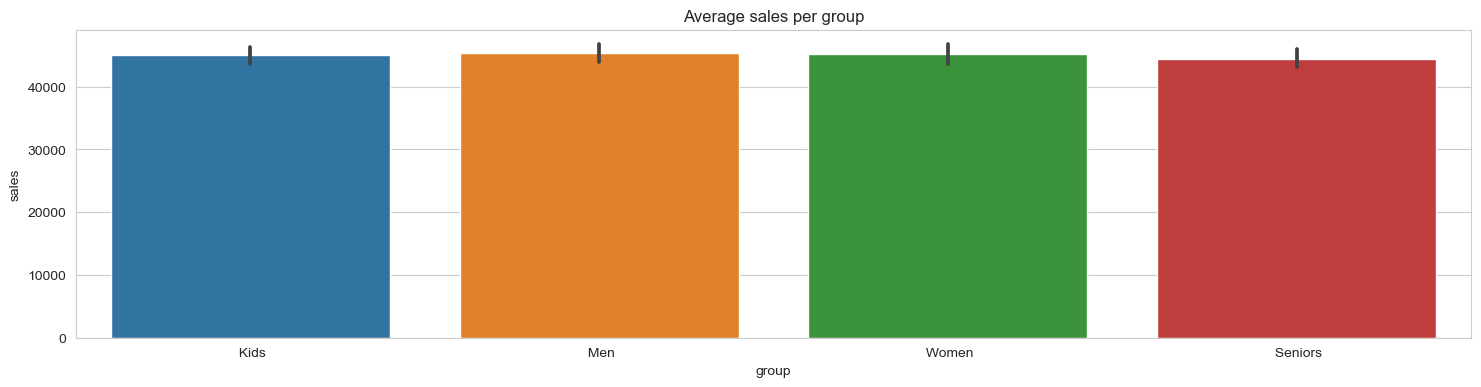

In [133]:
plt.figure(figsize=(18,4))
plt.title('Average sales per group')
sns.barplot(data=df_vis, x='group', y='sales')
plt.show()

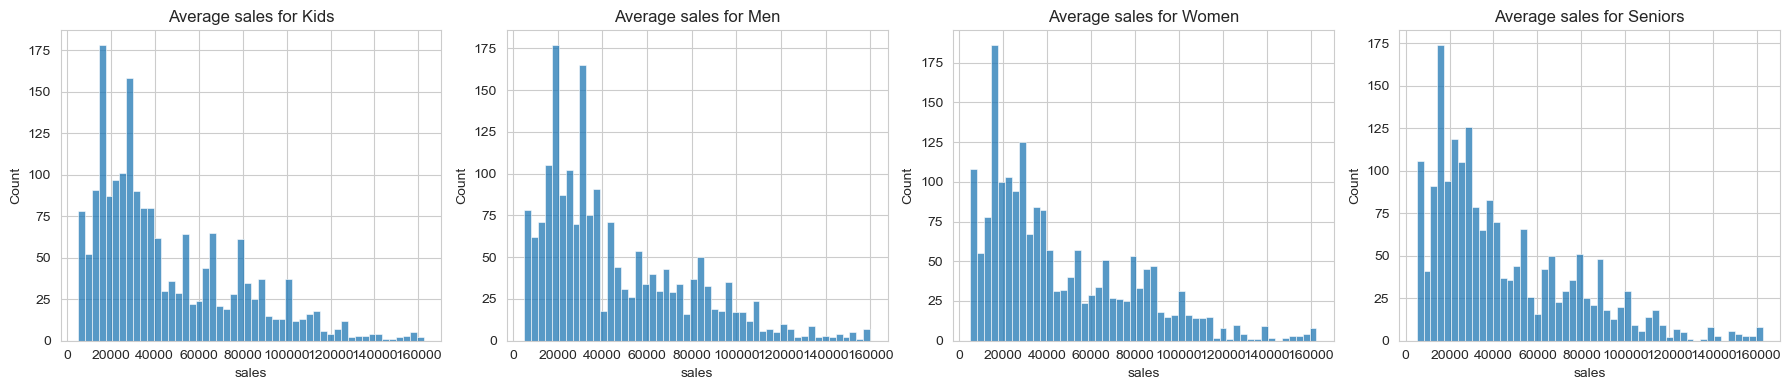

In [134]:
plt.figure(figsize=(18,4))
for i, col_name in enumerate(df_vis['group'].unique()):
    plt.subplot(1,4,i+1)
    plt.title(f'Average sales for{col_name}')
    sns.histplot(data=df_vis[ df_vis['group'] == col_name ], x='sales', bins=50)

plt.tight_layout()
plt.show()

### **Group-wise sales** analysis (kids, women, men, and seniors) across different states

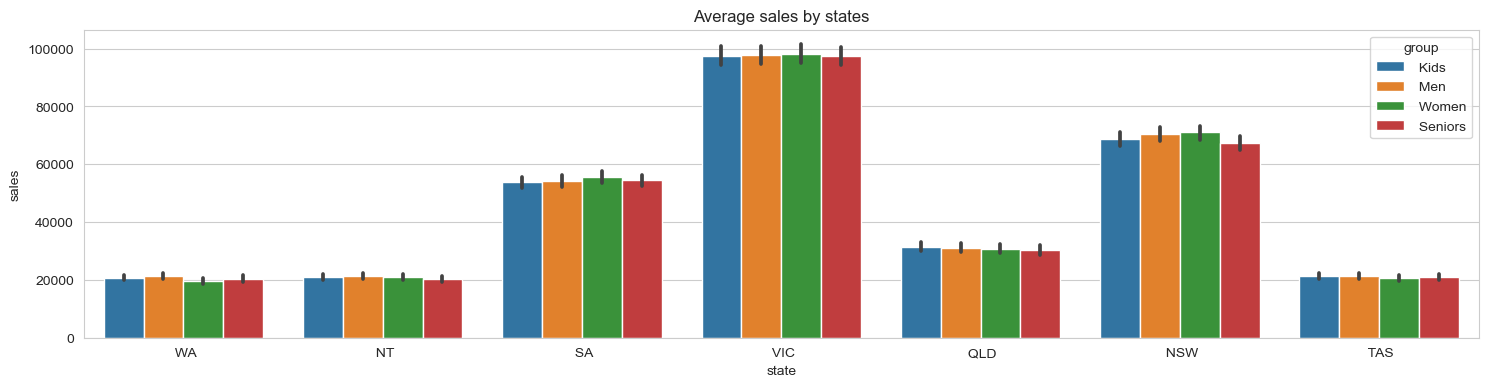

In [135]:
plt.figure(figsize=(18,4))
plt.title('Average sales by states')
sns.barplot(data=df_vis,x='state',y='sales',hue='group')
plt.show()

### More plots

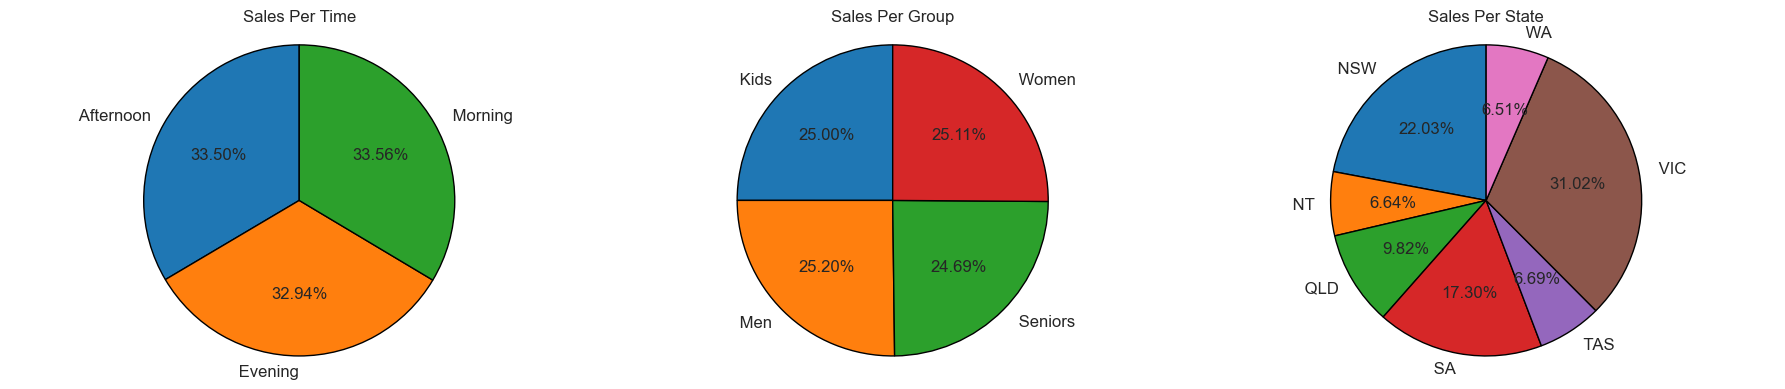

In [136]:
# Grouping and selecting only Sales column.
sales_time_mean = df_vis.groupby(['time']).mean(numeric_only=True)['sales']
sales_time_labels = sales_time_mean.index.tolist()

sales_group_mean = df_vis.groupby(['group']).mean(numeric_only=True)['sales']
sales_group_labels = sales_group_mean.index.tolist()

sales_state_mean = df_vis.groupby(['state']).mean(numeric_only=True)['sales']
sales_state_labels = sales_state_mean.index.tolist()

## Figure settings
plt.figure(figsize=(18,4))

## Figure 1
plt.subplot(1,3,1)
plt.title('Sales Per Time')
plt.pie(x=sales_time_mean,labels=sales_time_labels,autopct='%.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.axis('equal')

## Figure 2
plt.subplot(1,3,2)
plt.title('Sales Per Group')
plt.pie(x=sales_group_mean,labels=sales_group_labels,autopct='%.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.axis('equal')

## Figure 3
plt.subplot(1,3,3)
plt.title('Sales Per State')
plt.pie(x=sales_state_mean,labels=sales_state_labels,autopct='%.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.axis('equal')

plt.tight_layout()
plt.show()

### **Time-of-the-day** analysis: during which time of the day are sales the highest, and during which time are sales the lowest?

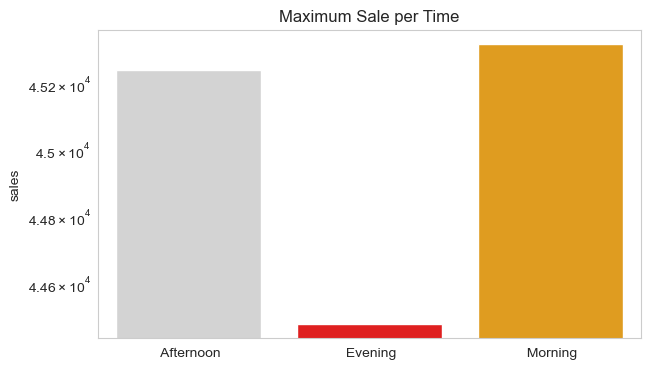

In [142]:
# Colorize the maximum
color_time = ['lightgray'] * len(sales_time_mean) # Repeat 3 times = repeating the color 
color_time[np.argmax(sales_time_mean)] = 'orange' # High value index
color_time[np.argmin(sales_time_mean)] = 'red' # Low value index

# Plot Setting
plt.figure(figsize=(7,4))

plt.title('Maximum Sale per Time')
sns.barplot(x=sales_time_labels,y=sales_time_mean, palette=color_time)
plt.yscale('log')

plt.show()

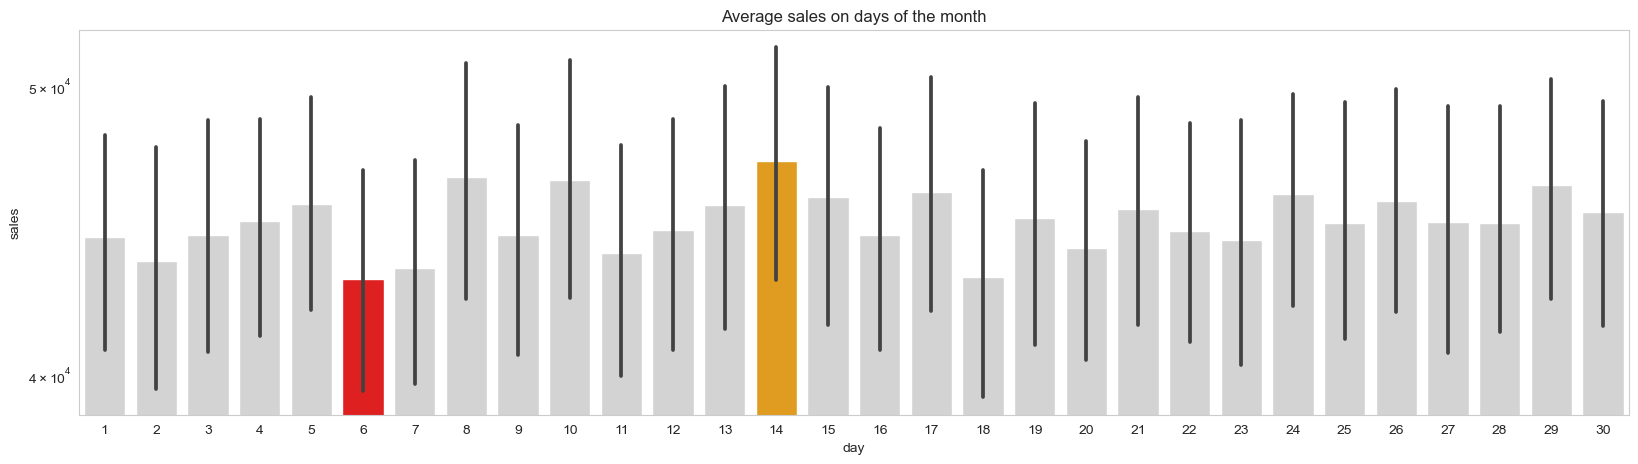

In [138]:
# Maximum sale by day  
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

sales_days_mean = df.groupby(['day']).mean(numeric_only=True)['sales'] # Average sale by day 
color_group = ['lightgray'] * 30
color_group[np.argmax(sales_days_mean)] = 'orange'
color_group[np.argmin(sales_days_mean)] = 'red'

plt.figure(figsize=(20,5))
plt.title('Average sales on days of the month')
sns.barplot(data=df,x='day',y='sales', palette=color_group)
plt.yscale('log')

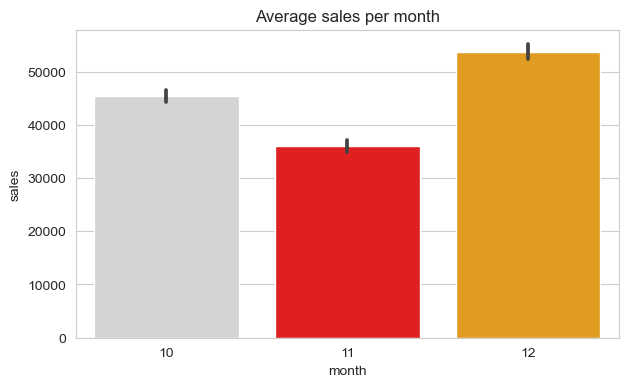

In [139]:
# Grouping and selecting only Sales column.
sales_month_mean = df.groupby(['month']).mean(numeric_only=True)['sales']
color_group = ['lightgray'] * 3
color_group[np.argmax(sales_month_mean)] = 'orange'
color_group[np.argmin(sales_month_mean)] = 'red'

plt.figure(figsize=(7,4))
plt.title('Average sales per month')
sns.barplot(data=df,x='month',y='sales', palette=color_group)
plt.show()

### The dashboard must contain daily, weekly, monthly and quarterly charts.

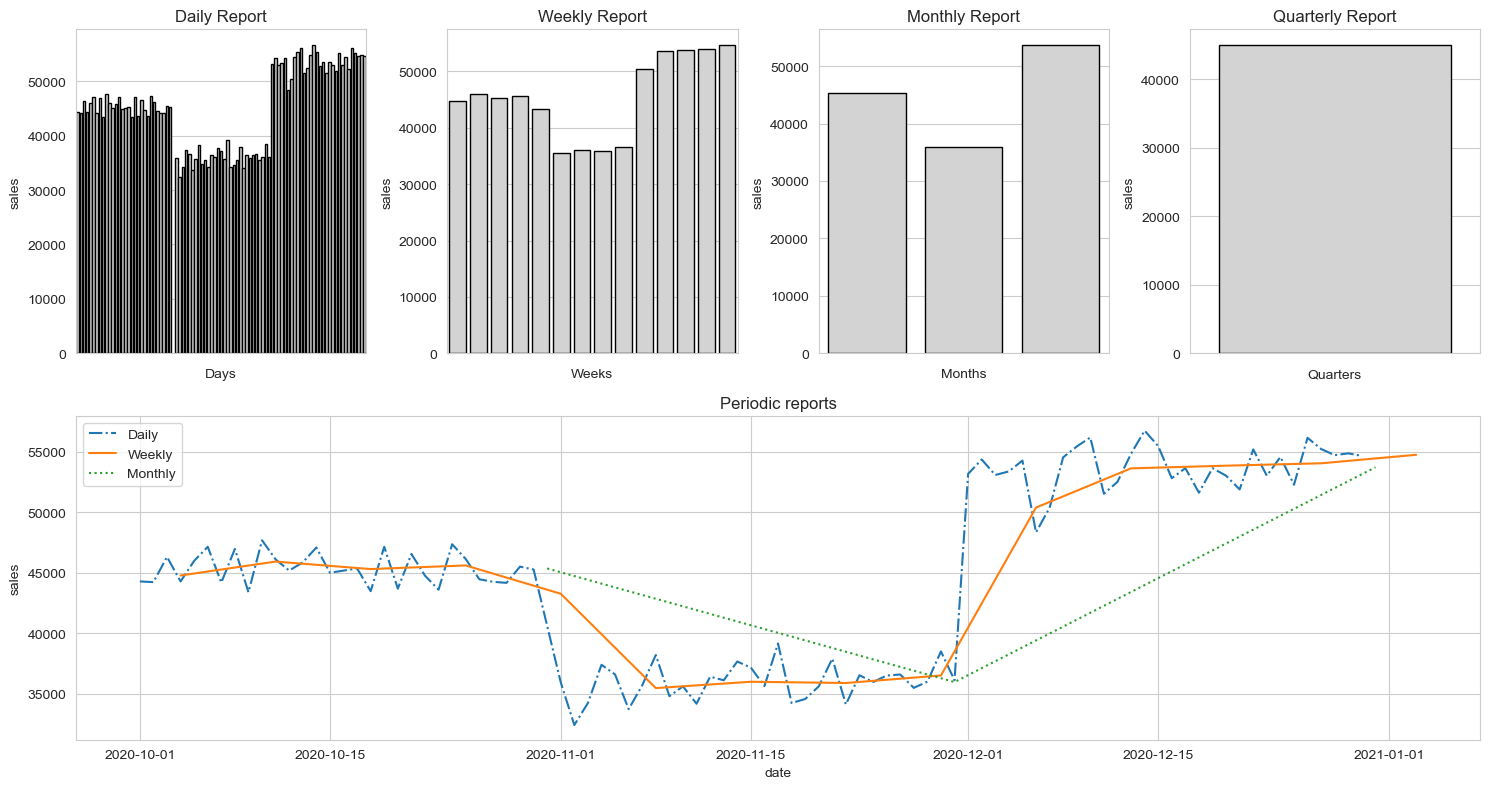

In [140]:
fig, axes = plt.subplot_mosaic(
    [['0', '1', '2','3'],
     ['b', 'b', 'b','b']], figsize=(15,8)
)

# Titles
axes['0'].set_title('Daily Report')
axes['1'].set_title('Weekly Report')
axes['2'].set_title('Monthly Report')
axes['3'].set_title('Quarterly Report')
axes['b'].set_title('Periodic reports')

# Plots
sns.barplot(data=daily.reset_index(),x='date',y='sales',ax=axes['0'],color='lightgray',edgecolor='black')
sns.barplot(data=weekly.reset_index(),x='date',y='sales',ax=axes['1'],color='lightgray',edgecolor='black')
sns.barplot(data=monthly.reset_index(),x='date',y='sales',ax=axes['2'],color='lightgray',edgecolor='black')
sns.barplot(data=quarterly.reset_index(),x='date',y='sales',ax=axes['3'],color='lightgray',edgecolor='black')

# Axis ticks and labels
axes['0'].set(xticklabels=[],xlabel='Days')
axes['1'].set(xticklabels=[],xlabel='Weeks')
axes['2'].set(xticklabels=[],xlabel='Months')
axes['3'].set(xticklabels=[],xlabel='Quarters')

# Line plot
sns.lineplot(data=daily, label='Daily', linestyle='dashdot',ax=axes['b'])
sns.lineplot(data=weekly, label='Weekly',ax=axes['b'])
sns.lineplot(data=monthly, label='Monthly', linestyle='dotted',ax=axes['b'])

plt.tight_layout()
plt.show()